In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

# Reflect Tables into SQLAlchemy ORM

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
alldata = engine.execute('SELECT * FROM measurement WHERE date >= "2016-10-27" AND date < "2017-10-27"').fetchall()
alldata_df = pd.DataFrame.from_dict(alldata)  
alldata_df.columns = ['a','station','date','precipitation','tobs']

#alldata_df.head()
# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores
mo12data = engine.execute('SELECT date,prcp FROM measurement WHERE date >= "2016-10-27" AND date < "2017-10-27"').fetchall()
#print(mo12data)
data2yrsago = mo12data
#print(data2yrsago)
# Save the query results as a Pandas DataFrame and set the index to the date column
date2_df = pd.DataFrame.from_dict(data2yrsago)
#date2_df.head(10)
date2_df.columns = ['date','precipitation']
#date2_df.head()
bydate_df = date2_df.set_index('date', inplace=False)
#bydate_df.head()
alldata

[(2429, 'USC00519397', '2016-10-27', 0.0, 77.0),
 (2430, 'USC00519397', '2016-10-28', 0.0, 78.0),
 (2431, 'USC00519397', '2016-10-29', 0.0, 77.0),
 (2432, 'USC00519397', '2016-10-30', 0.24, 76.0),
 (2433, 'USC00519397', '2016-10-31', 0.03, 77.0),
 (2434, 'USC00519397', '2016-11-01', 0.0, 77.0),
 (2435, 'USC00519397', '2016-11-02', 0.0, 77.0),
 (2436, 'USC00519397', '2016-11-03', 0.0, 77.0),
 (2437, 'USC00519397', '2016-11-04', 0.0, 77.0),
 (2438, 'USC00519397', '2016-11-05', 0.0, 76.0),
 (2439, 'USC00519397', '2016-11-06', 0.0, 75.0),
 (2440, 'USC00519397', '2016-11-07', 0.0, 71.0),
 (2441, 'USC00519397', '2016-11-08', 0.07, 71.0),
 (2442, 'USC00519397', '2016-11-09', 0.0, 71.0),
 (2443, 'USC00519397', '2016-11-10', 0.0, 71.0),
 (2444, 'USC00519397', '2016-11-11', 0.0, 72.0),
 (2445, 'USC00519397', '2016-11-12', 0.0, 71.0),
 (2446, 'USC00519397', '2016-11-13', 0.0, 72.0),
 (2447, 'USC00519397', '2016-11-14', 0.0, 77.0),
 (2448, 'USC00519397', '2016-11-15', 0.0, 77.0),
 (2449, 'USC00519

In [12]:
#FOR FLASK APP:0
flaskdata1 = alldata_df.drop(['a','station','precipitation'], axis=1)

# with open("test.json", "w+") as output_file:
#     output_file.write(flaskdata2)
flaskdict1 = flaskdata1.set_index('date').T.to_dict('list')
flaskdict1
import json
with open('flaskdict1.json', 'w') as outfile:
    json.dump(flaskdict1, outfile)
    outfile.close()

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  


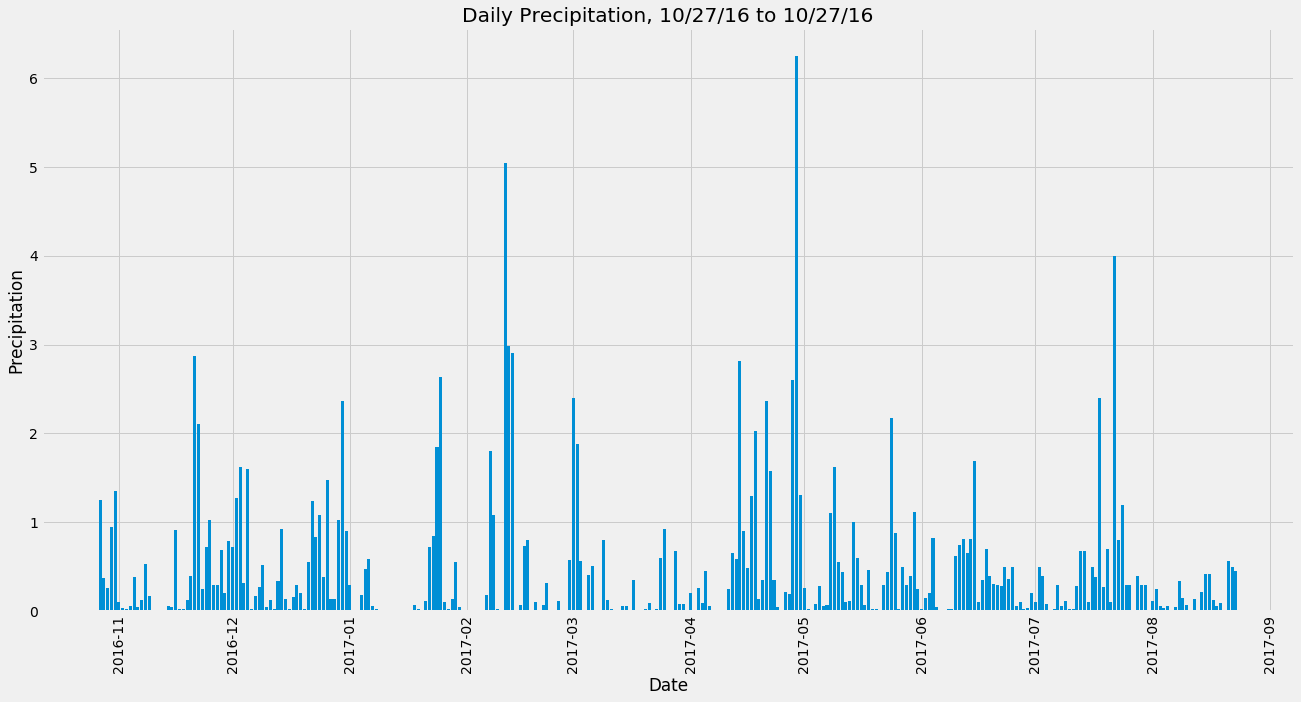

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
new_df = date2_df.reset_index()
new_df.head()
x1 = new_df['date'].tolist()
x2 = pd.to_datetime(x1,infer_datetime_format=True)
y1 = new_df['precipitation'].tolist()

plt.figure(figsize=(20,10))

plt.bar(x2, y1)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Daily Precipitation, 10/27/16 to 10/27/16')
plt.xticks(rotation=90)
plt.show()

# Rotate the xticks for the dates

![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
description = new_df['precipitation'].describe()
description_df = pd.DataFrame.from_dict(description)
description_df

precipitation
count    1646.000000
mean        0.165595
std         0.431122
min         0.000000
25%         0.000000
50%         0.010000
75%         0.120000
max         6.250000

In [15]:
#STATION ANALYSIS

In [16]:
# How many stations are available in this dataset?
alldata_df.groupby('station').count()
print(len('station'))

7


In [17]:
# What are the most active stations?
# alldata_df.sort_values(['station'], axis=0, ascending=False)
alldata_df['station'].max()
# alldata_df['station'].value_counts()

'USC00519523'

In [18]:
# List the stations and the counts in descending order.
alldata_df['station'].value_counts()

USC00519397    296
USC00519281    287
USC00516128    285
USC00513117    278
USC00519523    274
USC00514830    252
USC00517948    144
Name: station, dtype: int64

In [19]:
# Query the last 12 months of temperature observation data for this station 
easydata2 = engine.execute('SELECT * FROM measurement WHERE date >= "2016-10-27" AND date < "2017-10-27" AND station ="USC00519397"').fetchall()#print(easydata2)

easydata2_df = pd.DataFrame(easydata2)
easydata2_df.head()

0            1           2     3     4
0  2429  USC00519397  2016-10-27  0.00  77.0
1  2430  USC00519397  2016-10-28  0.00  78.0
2  2431  USC00519397  2016-10-29  0.00  77.0
3  2432  USC00519397  2016-10-30  0.24  76.0
4  2433  USC00519397  2016-10-31  0.03  77.0

C:\Users\micha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


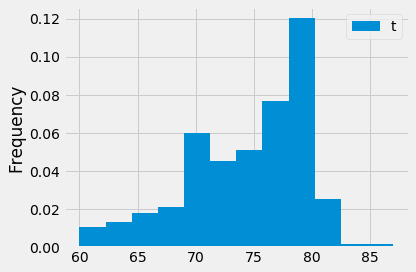

In [20]:
#and plot the results as a histogram
easydata2_df = pd.DataFrame.from_dict(easydata2)
temp = easydata2_df[4].tolist()
#print(temp)
plt.hist(temp, normed=True, bins=12)
plt.ylabel('Frequency')
plt.legend('tobs')
plt.tight_layout()
plt.show()

In [21]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#PICKED 10 DAYS FROM THE START OF THE YEAR


print(calc_temps('2016-10-28', '2017-10-28'))

[(58.0, 73.8783858485351, 87.0)]


-7.569999999999993
4.430000000000007


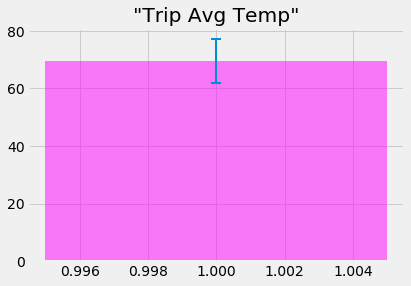

In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title

D = 69.57
yerr = 62.0 - D
print(yerr)
yerr1 = 74.0 - D
print(yerr1)
yerr2 = [yerr,yerr1]
plt.title('"Trip Avg Temp"')
plt.bar(1, D, alpha=0.5, color='magenta', width=0.01)
plt.errorbar(1, 69.57, yerr = yerr, lw=2, capsize=5, capthick=2)

plt.show()

# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [24]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# easydata3 = engine.execute('SELECT date, station, prcp FROM measurement WHERE date >= "2016-10-27" AND date < "2017-10-27"').fetchall()
# easydata_df3 = pd.DataFrame.from_dict(easydata3)
# easydata_df3.columns = ['date','station','precipitation']
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# easydata_df3
 
# # stations = engine.execute('select * from measurement a join station b on a.station=b.station').fetchall()
# # #print(stations)
# # station_df = pd.DataFrame.from_dict(stations)
# # #station_df
# #same_sporder = session.query(station,measurement).filter(station.station == measurement.station).limit(10).all()

# # easydata_df3.head()

# # #easydata_df4 = easydata_df3.join(station_df, axis=0, join='outer', keys='station')
# # # station_df.columns = ['a', 'station','name','latitude','longitude','elevation']
# # # station_df
start_date = '2016-10-27'
end_date = '2017-11-04'
station_name = alldata_df.station.unique()
list1 = []
tempranges_df = pd.DataFrame()
#print (tempranges_df)


#print(station_name)
def tempranges(station):
            return session.query(func.sum(Measurement.prcp),func.min(Measurement.prcp), func.avg(Measurement.prcp), func.max(Measurement.prcp),(Measurement.station)).\
                filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).filter(Measurement.station == station).all()            
for i in station_name:
    list1.append(tempranges(i))
    
    #print(tempranges(i))       
tempranges_df = pd.DataFrame(list1)
tempranges_df

0
0  (13.409999999999991, 0.0, 0.04530405405405402,...
1  (40.95000000000005, 0.0, 0.14730215827338147, ...
2  (26.460000000000022, 0.0, 0.12082191780821928,...
3  (3.7600000000000002, 0.0, 0.07833333333333334,...
4  (31.499999999999993, 0.0, 0.12450592885375492,...
5  (55.140000000000015, 0.0, 0.19212543554006975,...
6  (101.34999999999997, 0.0, 0.3824528301886791, ...

In [25]:
tempranges_df1 = tempranges_df.apply(str)
t_df2 = tempranges_df1.str.split(',', expand=True)

## Optional Challenge Assignment

In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [28]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


In [112]:
x  = engine.execute('SELECT DISTINCT station FROM measurement').fetchall()
x

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [113]:
x  = engine.execute('SELECT DISTINCT station FROM measurement').fetchall()
ydf= pd.DataFrame(x).reset_index()
ydict = ydf.set_index([0]).T.to_dict('list')
ydict

{'USC00519397': [0],
 'USC00513117': [1],
 'USC00514830': [2],
 'USC00517948': [3],
 'USC00518838': [4],
 'USC00519523': [5],
 'USC00519281': [6],
 'USC00511918': [7],
 'USC00516128': [8]}

In [107]:
ylist = []
for i in range(len(x)):
    y = {'station':x[i]}
    ylist.append(y)
ydf= pd.DataFrame(x).reset_index()
yd  = ydf.to_dict('list')
yd

{'index': [0, 1, 2, 3, 4, 5, 6, 7, 8],
 0: ['USC00519397',
  'USC00513117',
  'USC00514830',
  'USC00517948',
  'USC00518838',
  'USC00519523',
  'USC00519281',
  'USC00511918',
  'USC00516128']}

In [70]:
print(list1)
tempranges_df = pd.DataFrame(list1)
tempranges_df = tempranges_df[0].str.split(',', expand=True)
tempranges_df = pd.DataFrame.from_records(list1)
tempranges_df

NameError: name 'list1' is not defined

In [26]:
# print(list1)
# tempranges_df = pd.DataFrame.from_records(list1)
# tempranges_df = tempranges_df[].str.split(',', expand=True)
# tempranges_df

SyntaxError: invalid syntax (<ipython-input-26-242f164104d8>, line 3)

In [132]:
date2_df

date  precipitation
0     2016-10-27           0.00
1     2016-10-28           0.00
2     2016-10-29           0.00
3     2016-10-30           0.24
4     2016-10-31           0.03
5     2016-11-01           0.00
6     2016-11-02           0.00
7     2016-11-03           0.00
8     2016-11-04           0.00
9     2016-11-05           0.00
10    2016-11-06           0.00
11    2016-11-07           0.00
12    2016-11-08           0.07
13    2016-11-09           0.00
14    2016-11-10           0.00
15    2016-11-11           0.00
16    2016-11-12           0.00
17    2016-11-13           0.00
18    2016-11-14           0.00
19    2016-11-15           0.00
20    2016-11-16           0.00
21    2016-11-17           0.00
22    2016-11-18           0.00
23    2016-11-19           0.03
24    2016-11-20           0.05
25    2016-11-21           0.01
26    2016-11-22           0.13
27    2016-11-23           0.14
28    2016-11-24           0.05
29    2016-11-25           0.05
...          ...            ...
1786  2017-07-24           0.84
1787  2017-07-25           0.30
1788  2017-07-26           0.30
1789  2017-07-27           0.00
1790  2017-07-28           0.40
1791  2017-07-29           0.30
1792  2017-07-30           0.30
1793  2017-07-31           0.00
1794  2017-08-01            NaN
1795  2017-08-02           0.25
1796  2017-08-03           0.06
1797  2017-08-05            NaN
1798  2017-08-06            NaN
1799  2017-08-07           0.05
1800  2017-08-08           0.34
1801  2017-08-09           0.15
1802  2017-08-10           0.07
1803  2017-08-11            NaN
1804  2017-08-12           0.14
1805  2017-08-13            NaN
1806  2017-08-14           0.22
1807  2017-08-15           0.42
1808  2017-08-16           0.42
1809  2017-08-17           0.13
1810  2017-08-18            NaN
1811  2017-08-19           0.09
1812  2017-08-20            NaN
1813  2017-08-21           0.56
1814  2017-08-22           0.50
1815  2017-08-23           0.45

[1816 rows x 2 columns]